In [31]:
import re 
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk import word_tokenize
df = pd.read_csv('df_Binario.csv', encoding='ISO-8859-1')


In [36]:
mask1 = np.array(Image.open('MM.png'))
mask1 = 255 - mask1

def render_img(ngramas, texto):
    wordcloud_wed = WordCloud(
        width=1200,
        height=1200,
        colormap='magma',
        background_color='black',
        min_font_size=6,
        mask = mask1 #Estableces la mascara antes mencionada
    ).generate_from_frequencies(dict(ngramas))#Se le pasa la lista de palabras

    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud_wed) 
    plt.title(texto)#Se le agrega el titulo de la wordcloud
    plt.axis("off")
    plt.tight_layout()

def get_enegrams (n,columna):
    vocab = []
    for text in columna:
        n_gram = ngrams(word_tokenize(text), n)
        for ngram in n_gram:
            resultado = ' '.join(ngram)
            vocab.append(resultado)
            
    return pd.Series(vocab). value_counts()

Good_B = get_enegrams(2,df[df["Sentiment"] == 'Good']["Texto_limpio"])

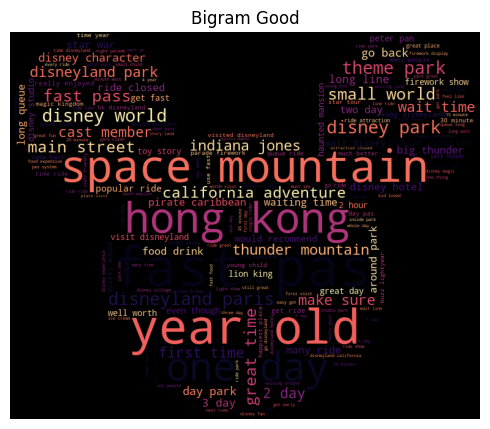

In [37]:
render_img(Good_B,'Bigram Good')

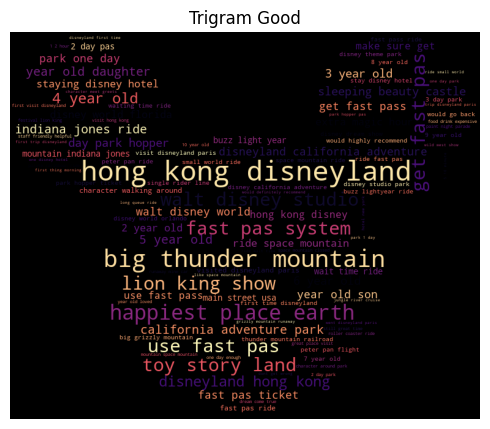

In [39]:
Good_t = get_enegrams(3,df[df["Sentiment"] == 'Good']["Texto_limpio"])
render_img(Good_t,'Trigram Good')

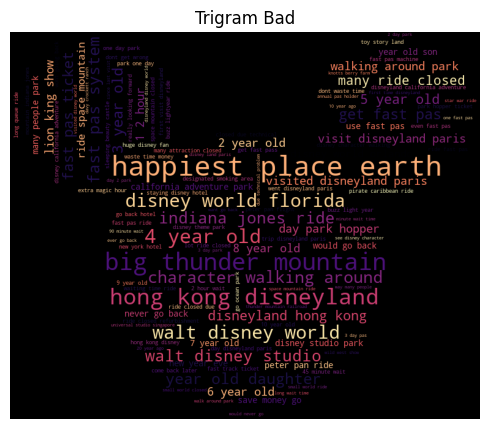

In [42]:
Bad_t = get_enegrams(3,df[df["Sentiment"] == 'Bad']["Texto_limpio"])
render_img(Bad_t,'Trigram Bad')

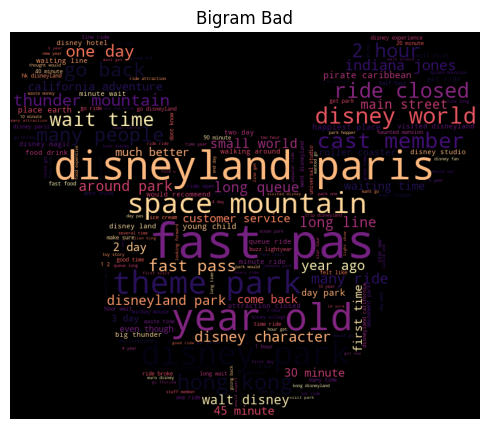

In [46]:
Bad_b = get_enegrams(2,df[df["Sentiment"] == 'Bad']["Texto_limpio"])
render_img(Bad_b,'Bigram Bad')